In [1]:
import torch
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import datetime
import torch.nn as nn
from sklearn.model_selection import train_test_split

C:\Users\Nimuthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch.utils.data import DataLoader, Dataset

In [3]:
data = pd.read_csv('climatedatawithdate.csv')
# Preprocess the data as required

# check for missing values
print(data.isnull().sum())
# drop rows with missing values
data.dropna(inplace=True)

puttalam    0
tauu        0
rlus        0
sfcWind     0
rsuscs      0
rsus        0
rsdscs      0
prw         0
hurs        0
rtmt        0
ua_850      0
evspsbl     0
vas         0
clwvi       0
rsutcs      0
rsds        0
ua_500      0
va_850      0
pr          0
huss        0
sbl         0
zg_500      0
wap_500     0
clt         0
va_500      0
clivi       0
ta_500      0
psl         0
hfls        0
hfss        0
prc         0
ps          0
rlds        0
rldcs       0
rlut        0
rlutcs      0
rsdt        0
rsut        0
ta_850      0
tas         0
tasmax      0
tasmin      0
tauv        0
tro3_500    0
tro3_850    0
ts          0
uas         0
wap_850     0
zg_850      0
date        0
dtype: int64


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.set_index('date', inplace=True)

In [6]:
conditions = data[['tauu', 'rlus', 'sfcWind', 'rsuscs', 'rsus', 'rsdscs', 'prw', 'hurs', 'rsuscs', 'rsus', 'rsdscs', 'prw', 'hurs', 'rtmt',
                   'ua_850', 'evspsbl', 'vas', 'clwvi', 'rsutcs', 'rsds', 'ua_500', 'va_850', 'pr', 'huss', 'sbl', 'zg_500', 'wap_500', 'clt', 
                   'va_500', 'clivi', 'ta_500', 'psl', 'hfls', 'hfss', 'prc', 'ps', 'rlds', 'rldcs','rlut', 'rlutcs', 'rsdt', 'rsut', 'ta_850', 
                   'tas', 'tasmax', 'tasmin', 'tauv', 'tro3_500', 'tro3_850', 'ts', 'uas', 'wap_850', 'zg_850']].values  # Input features
precipitation = data['puttalam'].values  # Output variable

In [7]:
class TimeSeriesDataset(Dataset):
    def __init__(self, conditions, precipitation):
        self.conditions = conditions
        self.precipitation = precipitation

    def __len__(self):
        return len(self.conditions)

    def __getitem__(self, index):
        x = self.conditions[index]
        y = self.precipitation[index]
        return x, y

In [8]:
# Split the data into training and testing sets based on dates
conditions_train, conditions_test, precipitation_train, precipitation_test = train_test_split(
    conditions, precipitation, test_size=0.2, shuffle=False
)

In [9]:
# Convert the data to PyTorch tensors
conditions_train = torch.tensor(conditions_train, dtype=torch.float32)
precipitation_train = torch.tensor(precipitation_train, dtype=torch.float32)
conditions_test = torch.tensor(conditions_test, dtype=torch.float32)
precipitation_test = torch.tensor(precipitation_test, dtype=torch.float32)

In [10]:
from torch.utils.data import DataLoader, TensorDataset

In [11]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return out

input_dim = conditions.shape[1]  # Number of input features
output_dim = 1  # Number of output classes
hidden_dim = 64  # Number of hidden units

model = LSTMModel(input_dim, hidden_dim, output_dim)

In [12]:
criterion = nn.MSELoss()  # Use mean squared error for regression tasks
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Train the LSTM model
num_epochs = 10

for epoch in range(num_epochs):
    for inputs, targets in train_data_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')

NameError: name 'train_data_loader' is not defined

In [14]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    # Forward pass on the test data
    test_outputs = model(conditions_test)
    test_loss = criterion(test_outputs, precipitation_test)

# Print the test loss
print(f'Test Loss: {test_loss.item()}')

Test Loss: 19401.640625


C:\Users\Nimuthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([87])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [15]:
predicted_values = test_outputs.detach().numpy()
actual_values = precipitation_test.detach().numpy()


In [16]:
predicted_values = scaler.inverse_transform(predicted_values)
actual_values = scaler.inverse_transform(actual_values)

NameError: name 'scaler' is not defined

In [17]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(date, predicted_values, label='Predicted')
plt.plot(date, actual_values, label='Actual')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

NameError: name 'date' is not defined

<Figure size 1000x600 with 0 Axes>

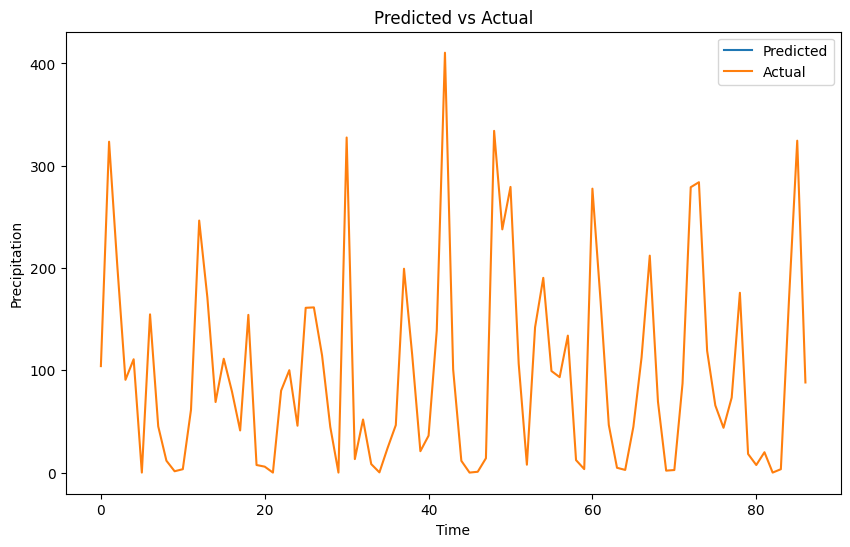

In [18]:
import matplotlib.pyplot as plt

# Plot the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(predicted_values, label='Predicted')
plt.plot(actual_values, label='Actual')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


In [19]:

# Read the dataset from the CSV file
data = pd.read_csv('climatedatawithdate.csv')


In [20]:
# Extract input (environmental conditions) and output (precipitation) columns
conditions = data[['tauu', 'rlus', 'sfcWind', 'rsuscs', 'rsus', 'rsdscs', 'prw', 'hurs', 'rsuscs', 'rsus', 'rsdscs', 'prw', 'hurs', 'rtmt',
                   'ua_850', 'evspsbl', 'vas', 'clwvi', 'rsutcs', 'rsds', 'ua_500', 'va_850', 'pr', 'huss', 'sbl', 'zg_500', 'wap_500', 'clt', 
                   'va_500', 'clivi', 'ta_500', 'psl', 'hfls', 'hfss', 'prc', 'ps', 'rlds', 'rldcs','rlut', 'rlutcs', 'rsdt', 'rsut', 'ta_850', 
                   'tas', 'tasmax', 'tasmin', 'tauv', 'tro3_500', 'tro3_850', 'ts', 'uas', 'wap_850', 'zg_850']].values
precipitation = data['puttalam'].values
dates = pd.to_datetime(data['date']).values


In [21]:

# Split the data into training and test sets based on a ratio (e.g., 80% for training, 20% for testing)
conditions_train, conditions_test, precipitation_train, precipitation_test, dates_train, dates_test = train_test_split(
    conditions, precipitation, dates, test_size=0.2, shuffle=False
)


In [22]:
import torch

# Convert the data to PyTorch tensors
conditions_train = torch.tensor(conditions_train, dtype=torch.float32)
precipitation_train = torch.tensor(precipitation_train, dtype=torch.float32)
conditions_test = torch.tensor(conditions_test, dtype=torch.float32)
precipitation_test = torch.tensor(precipitation_test, dtype=torch.float32)


In [23]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Define the dimensions of your LSTM model
input_size = conditions_train.shape[1]
hidden_size = 64
num_layers = 2
output_size = 1

# Create an instance of the LSTM model
model = LSTMModel(input_size, hidden_size, num_layers, output_size)


In [24]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [25]:
hx = torch.zeros(num_samples, hidden_size)
cx = torch.zeros(num_samples, hidden_size)

NameError: name 'num_samples' is not defined

In [26]:
# Assuming your conditions_train has shape (num_samples, timesteps, input_dim)

# Reshape hx and cx to be 2D tensors
hx = hx.view(1, num_samples, hidden_size)
cx = cx.view(1, num_samples, hidden_size)


NameError: name 'hx' is not defined

In [131]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    optimizer.zero_grad()
    
     # Convert the dtypes of inputs and targets to match
    conditions_train = conditions_train.to(dtype=torch.float32)
    targets = targets.to(dtype=torch.float32)

    # Forward pass
    outputs = model(conditions_train)
    loss = criterion(outputs, precipitation_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print the loss for monitoring
    print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}')


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [132]:
outputs, (hx, cx) = model(conditions_train, (hx, cx))


TypeError: forward() takes 2 positional arguments but 3 were given

In [133]:
# Assuming your conditions_train has shape (num_samples, timesteps, input_dim)

# Reshape the outputs to be 2D tensor
outputs = outputs.view(num_samples, timesteps, output_dim)


RuntimeError: shape '[422, 10, 1]' is invalid for input of size 1